In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [128]:
model_path = '/home/maloua/Malou_Master/5_Models/2_Final_Models/data/experiments/'
model_list = os.listdir(model_path)
for model in model_list: 
    number = model.split("_")[-1]
    number = number.rstrip()
    if not number.isdigit():
        model_list.remove(model)
model_list.remove("Model_2.2")

In [129]:
# Import models that were not in the experiments_folder

model2_path = '/home/maloua/Malou_Master/5_Models/2_Final_Models/'
second_model_list = os.listdir(model2_path)
for model in second_model_list:
    try:
        modellog = pd.read_csv(glob.glob(model2_path + model + "/data/experiments/*/log.csv")[0])
        model_list.append(model)
    except:
        pass

In [130]:
model_list = sorted(model_list, key=lambda x: int("".join([i for i in x if i.isdigit()])))

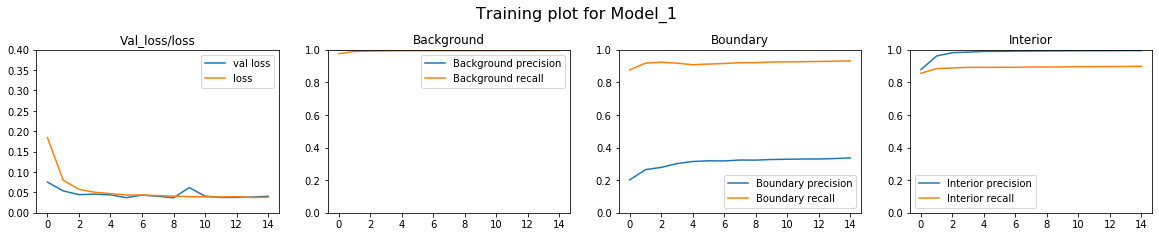

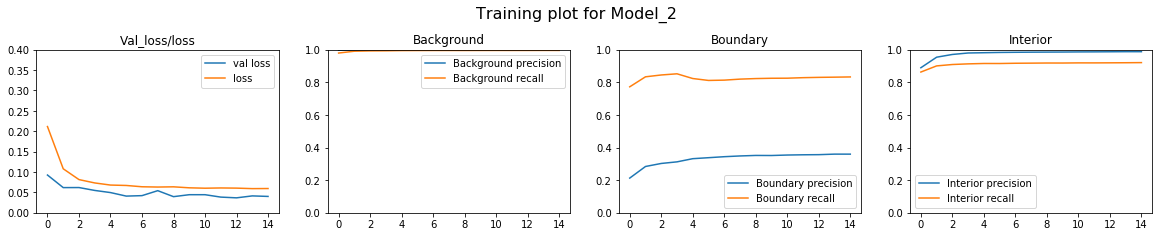

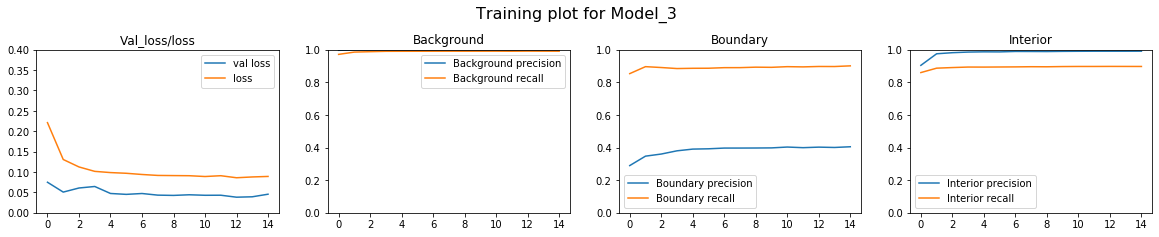

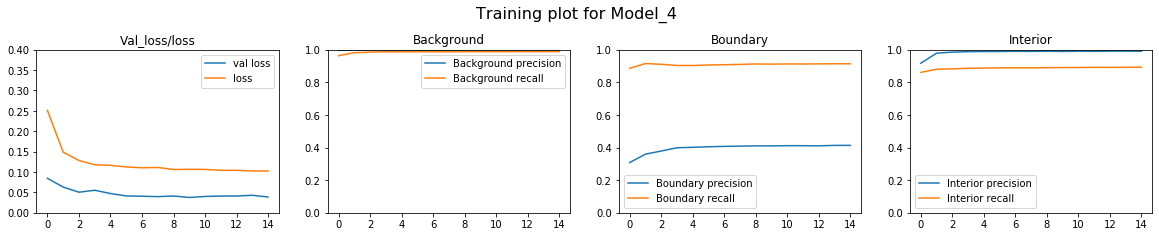

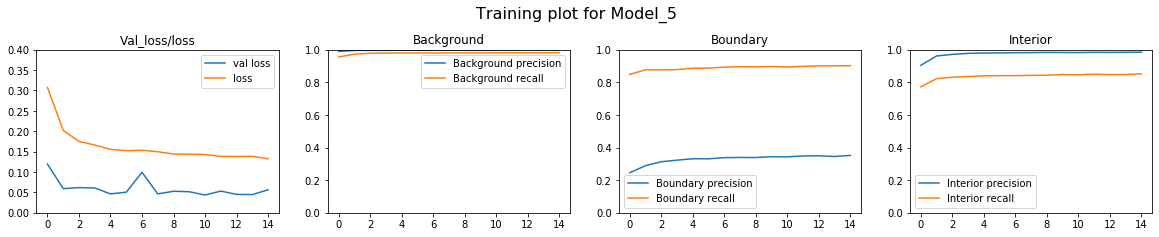

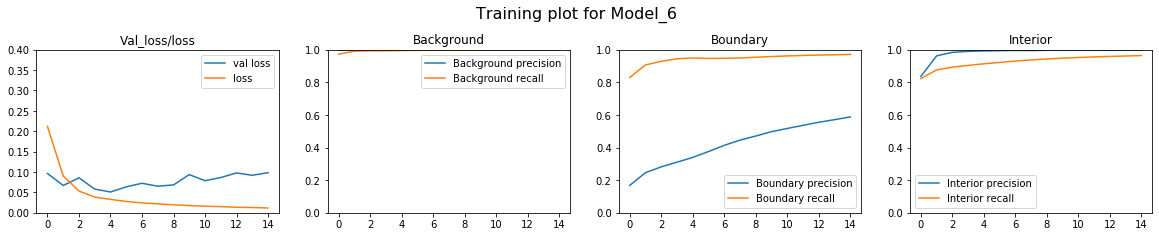

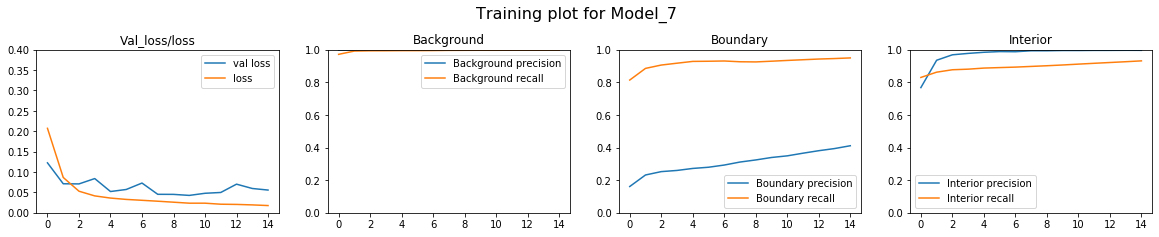

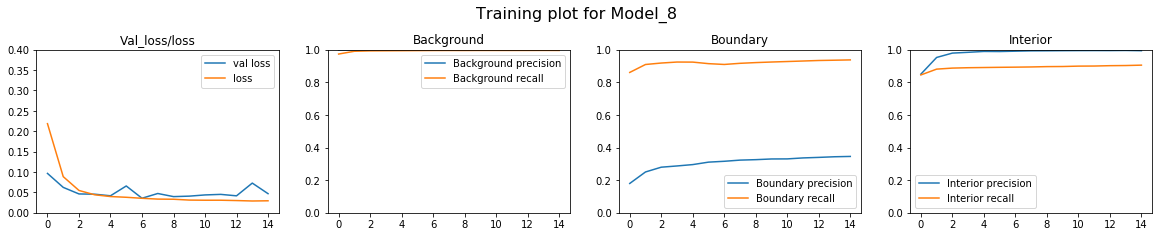

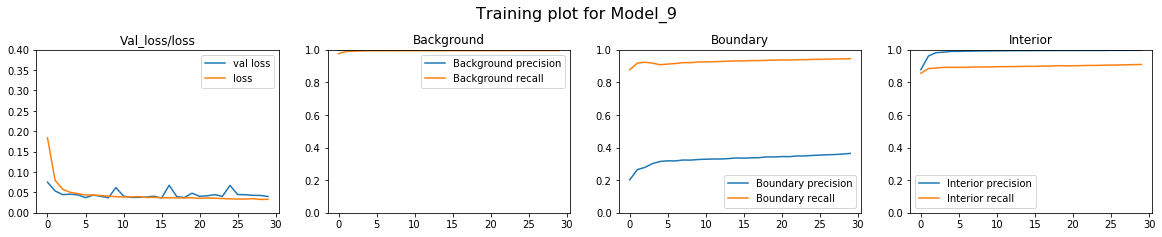

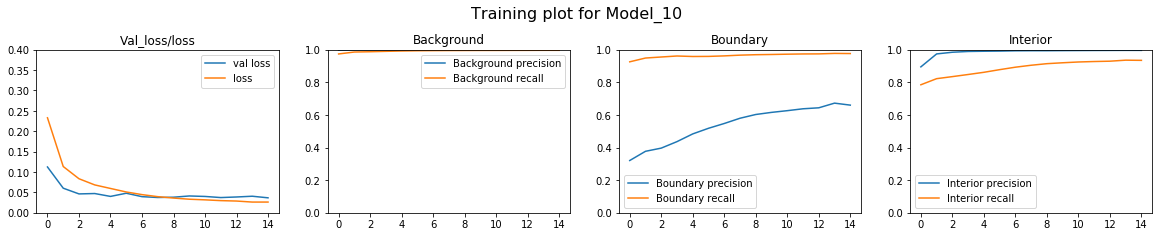

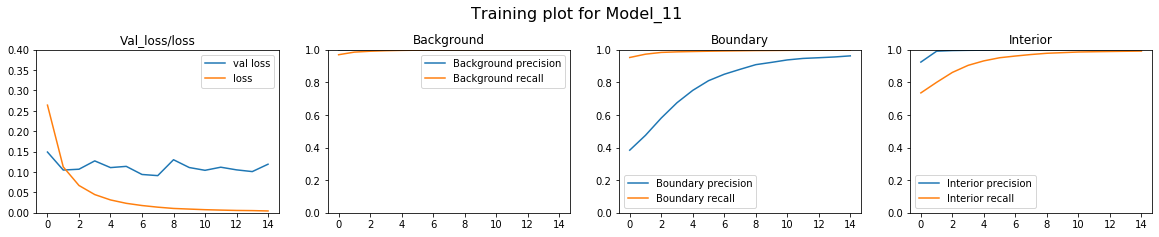

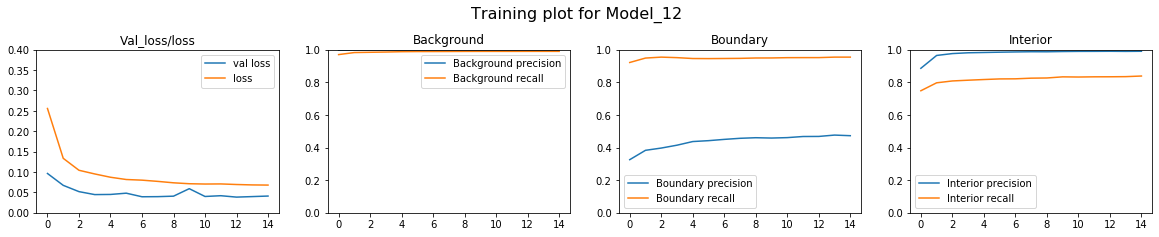

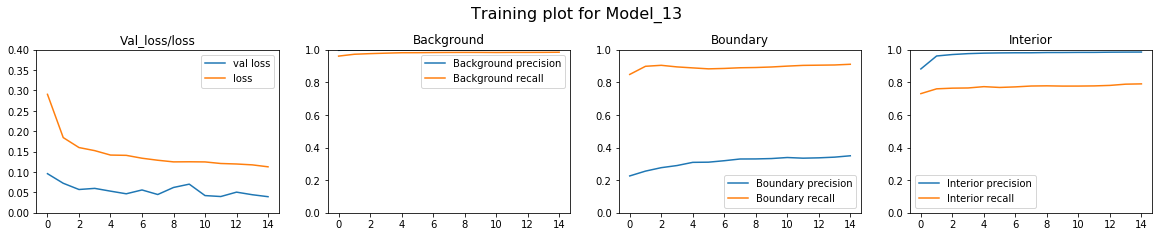

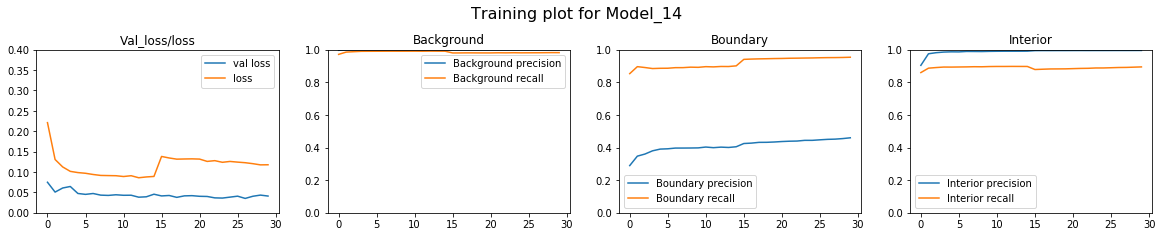

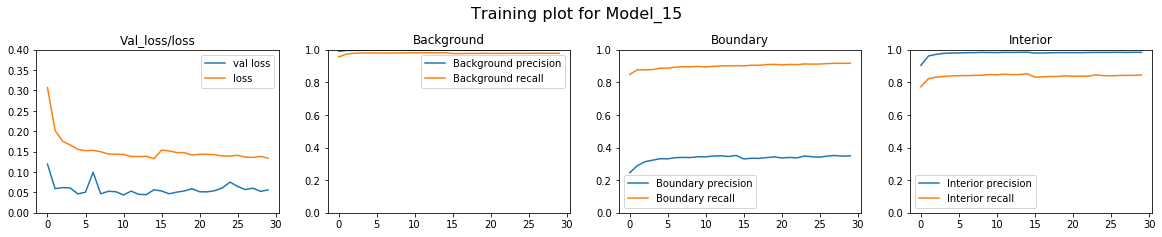

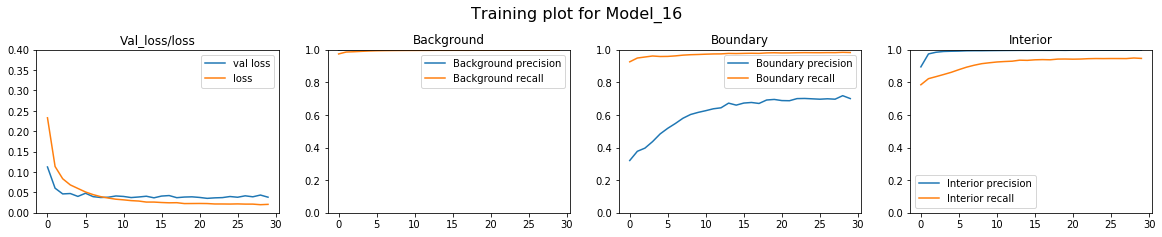

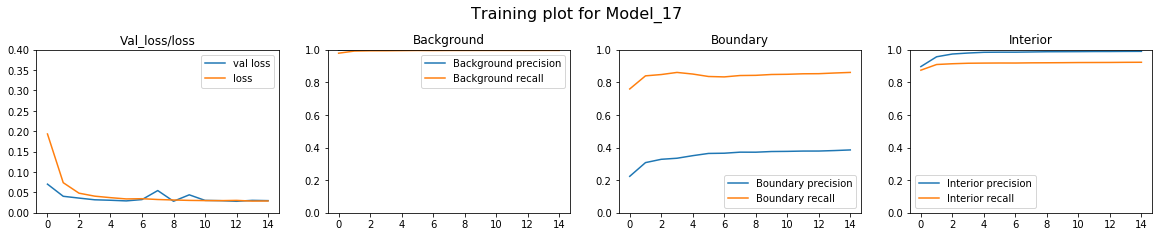

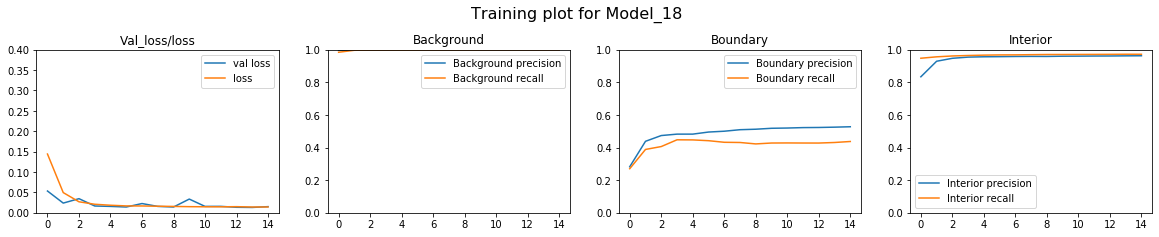

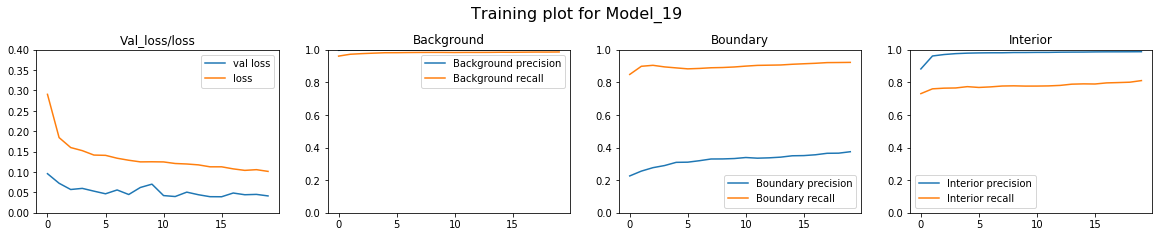

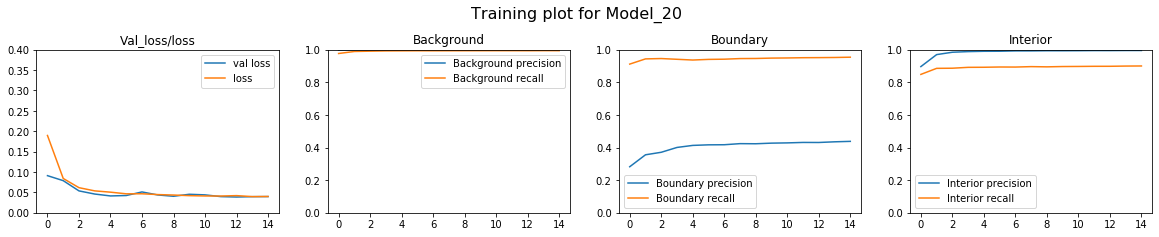

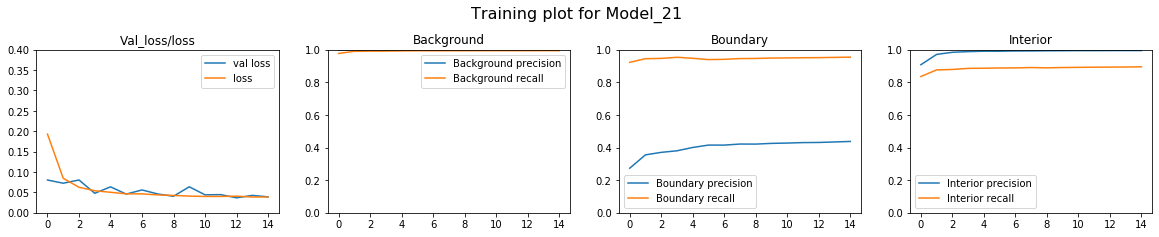

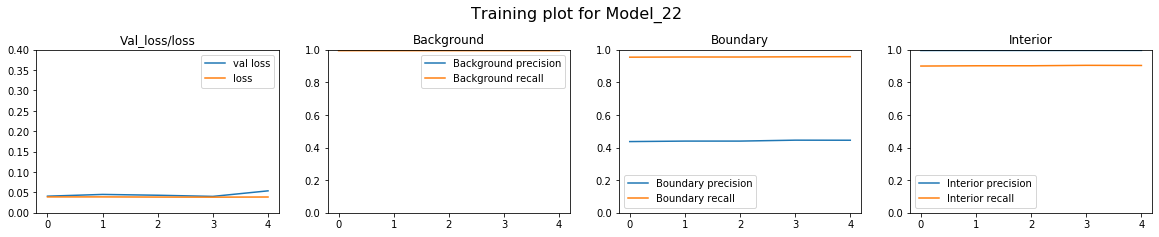

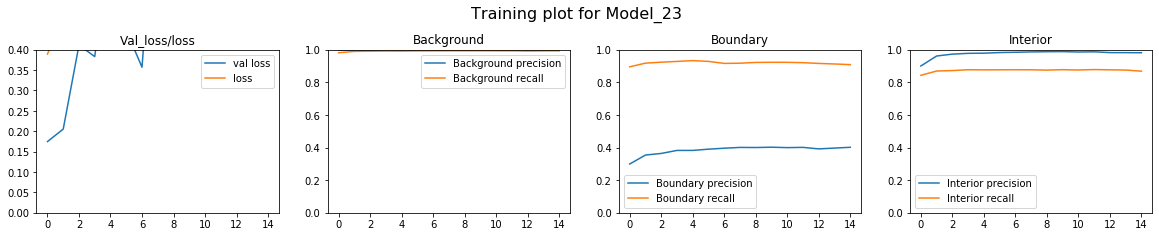

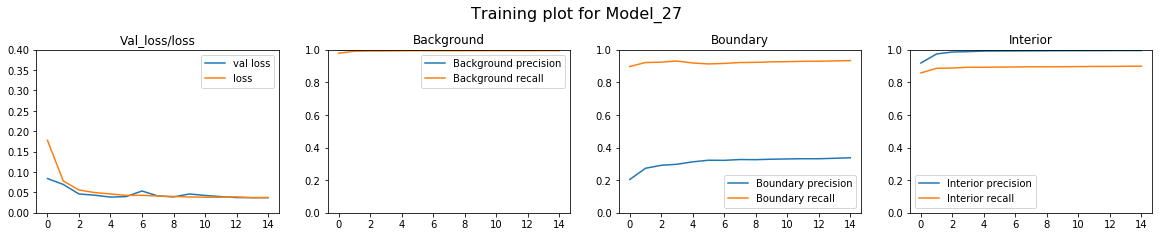

No log file for Model_30


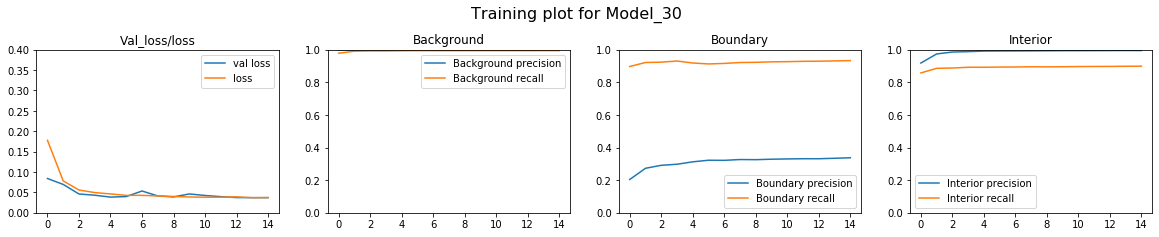

No log file for Model_31


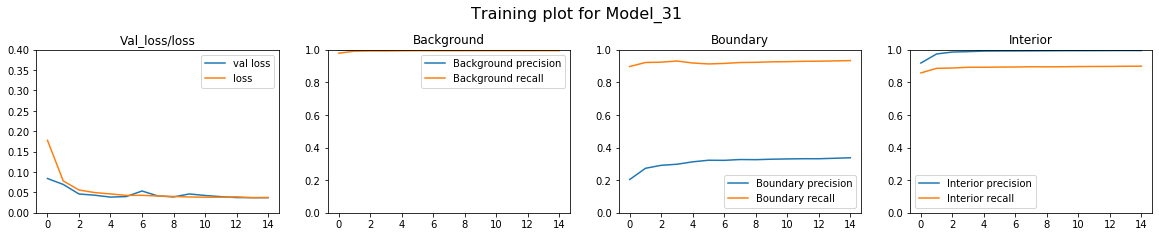

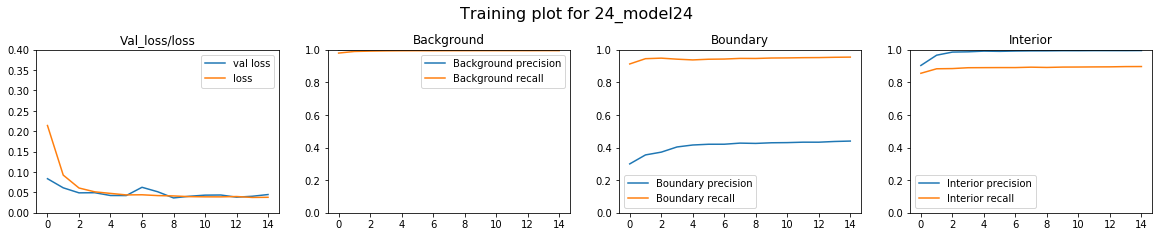

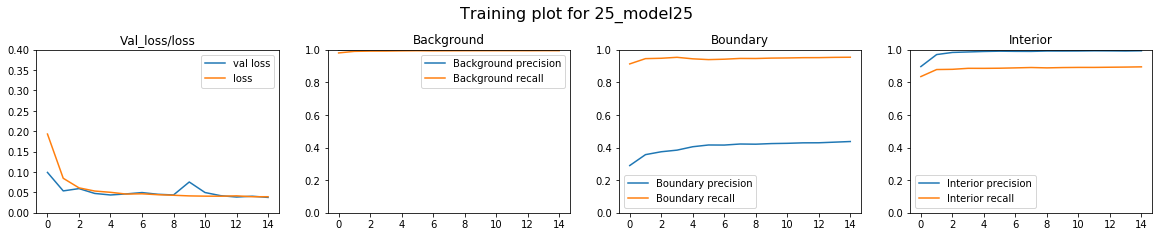

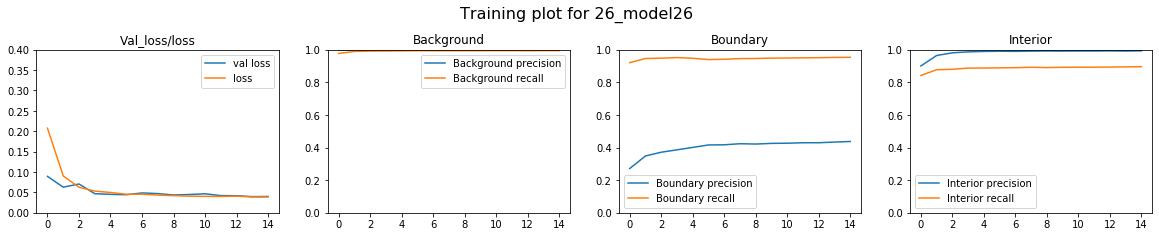

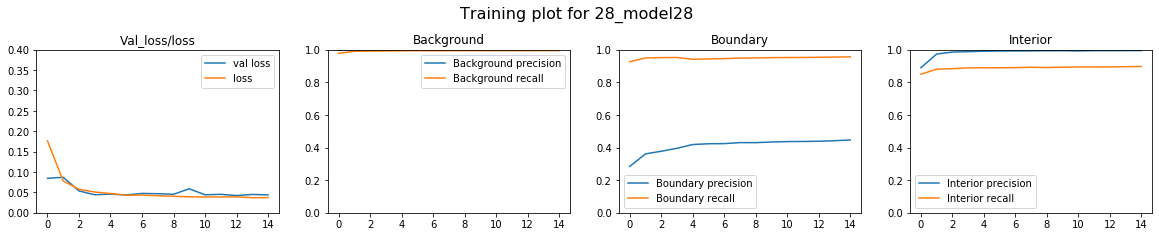

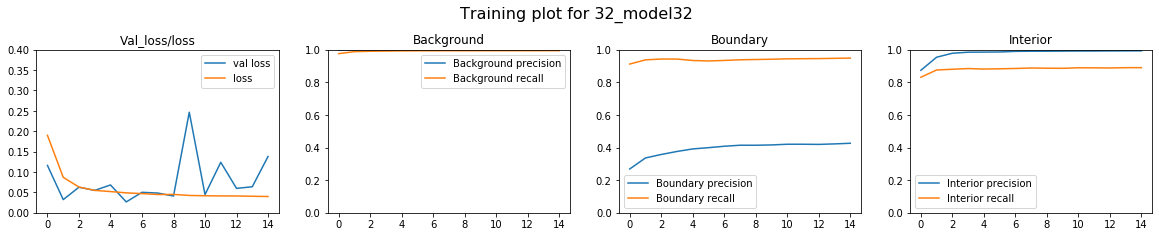

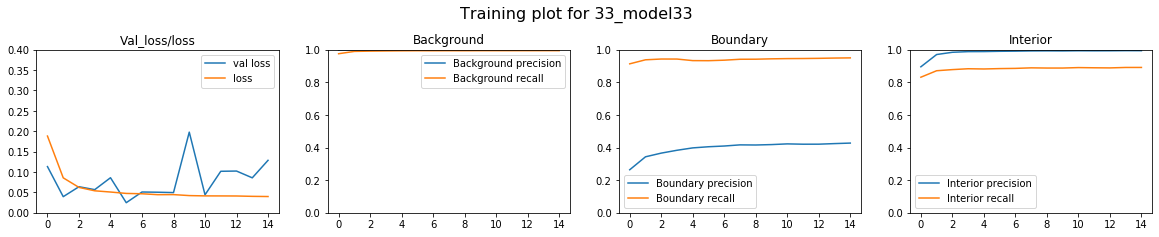

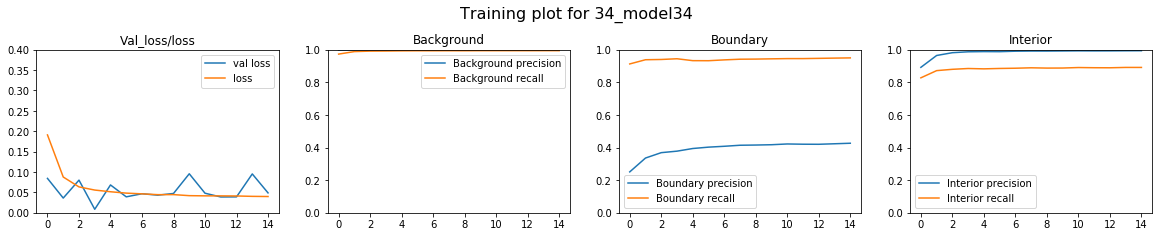

In [141]:


for folder in model_list:
    
    try:
        modellog = pd.read_csv(model_path + folder + "/log.csv")
    except:
        try:
            modellog = pd.read_csv(glob.glob(model2_path + folder + "/data/experiments/*/log.csv")[0])
        except:
            print("No log file for {}".format(folder))  
            pass
    figure, axes = plt.subplots(nrows=1, ncols=4, figsize = (20,3))
    
    axes[0].plot(modellog["epoch"], modellog["val_loss"], label = "val loss")
    axes[0].plot(modellog["epoch"], modellog["loss"], label = "loss")
    axes[0].set_title("Val_loss/loss")
    axes[0].set_ylim([0,0.4])
    axes[0].legend()
    
    axes[1].plot(modellog["epoch"], modellog["background_precision"], label = "Background precision")
    axes[1].plot(modellog["epoch"], modellog["background_recall"], label = "Background recall")
    axes[1].set_title("Background")
    axes[1].set_ylim([0,1])
    axes[1].legend()
    
    axes[2].plot(modellog["epoch"], modellog["boundary_precision"], label = "Boundary precision")
    axes[2].plot(modellog["epoch"], modellog["boundary_recall"], label = "Boundary recall")
    axes[2].set_title("Boundary")
    axes[2].set_ylim([0,1])
    axes[2].legend()
    
    axes[3].plot(modellog["epoch"], modellog["interior_precision"], label = "Interior precision")
    axes[3].plot(modellog["epoch"], modellog["interior_recall"], label = "Interior recall")
    axes[3].set_title("Interior")
    axes[3].set_ylim([0,1])
    axes[3].legend()
    
    figure.suptitle('Training plot for {}'.format(folder), fontsize = 16, y= 1.08)
    plt.show()
    